#                                                 Airlines Customer Satisfication

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import joblib

In [16]:
check = pd.read_csv('train.csv')

### Data Cleaning

In [17]:
# remove the columns full of null values
data = check.dropna(axis=1)

In [18]:
data.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
dtype: int64

In [19]:
df_encoded = pd.get_dummies(data, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'], drop_first=True)
df_encoded

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0,70172,13,460,3,4,3,1,5,3,...,4,5,5,25,neutral or dissatisfied,True,False,True,False,True
1,1,5047,25,235,3,2,3,3,1,3,...,1,4,1,1,neutral or dissatisfied,True,True,False,False,False
2,2,110028,26,1142,2,2,2,2,5,5,...,4,4,5,0,satisfied,False,False,False,False,False
3,3,24026,25,562,2,5,5,5,2,2,...,1,4,2,11,neutral or dissatisfied,False,False,False,False,False
4,4,119299,61,214,3,3,3,3,4,5,...,3,3,3,0,satisfied,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,23,192,2,1,2,3,2,2,...,2,3,2,3,neutral or dissatisfied,False,True,False,True,False
103900,103900,73097,49,2347,4,4,4,4,2,4,...,5,5,4,0,satisfied,True,False,False,False,False
103901,103901,68825,30,1995,1,1,1,3,4,1,...,5,5,4,7,neutral or dissatisfied,True,True,False,False,False
103902,103902,54173,22,1000,1,1,1,5,1,1,...,5,4,1,0,neutral or dissatisfied,False,True,False,True,False


In [20]:
df_encoded['satisfaction'] = df_encoded['satisfaction'].map({
    'satisfied':1,
    'neutral or dissatisfied':0
})
df_encoded['Gender_Male'] = df_encoded['Gender_Male'].astype(int)
df_encoded['Customer Type_disloyal Customer'] = df_encoded['Customer Type_disloyal Customer'].astype(int)
df_encoded['Type of Travel_Personal Travel'] = df_encoded['Type of Travel_Personal Travel'].astype(int)
df_encoded['Class_Eco'] = df_encoded['Class_Eco'].astype(int)
df_encoded['Class_Eco Plus'] = df_encoded['Class_Eco Plus'].astype(int)

## Z- Score
 
### Xstandardized = X - μ / σ

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # for standardization
df_standardScaler = scaler.fit_transform(df_encoded)
df_standardScaler

array([[-1.73203414,  0.1400769 , -1.7452793 , ...,  1.49061375,
        -0.90432653,  3.58677552],
       [-1.7320008 , -1.59827564, -0.95136024, ..., -0.6708646 ,
        -0.90432653, -0.27880195],
       [-1.73196746,  1.20393531, -0.88520032, ..., -0.6708646 ,
        -0.90432653, -0.27880195],
       ...,
       [ 1.73196746,  0.10412203, -0.62056063, ..., -0.6708646 ,
        -0.90432653, -0.27880195],
       [ 1.7320008 , -0.28697726, -1.14984   , ..., -0.6708646 ,
         1.10579527, -0.27880195],
       [ 1.73203414, -0.06291997, -0.8190404 , ..., -0.6708646 ,
        -0.90432653, -0.27880195]])

## Exploratory Data Analysis (EDA)

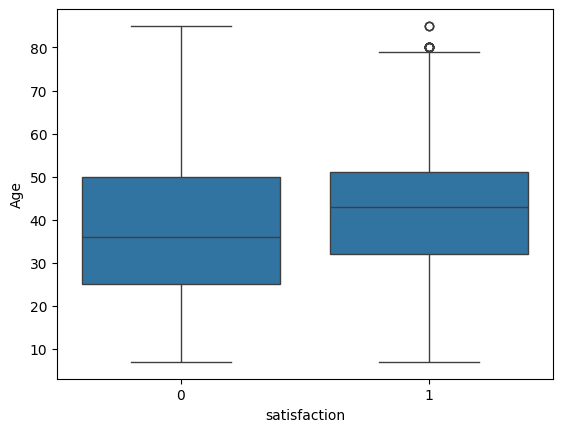

In [22]:
sns.boxplot(x='satisfaction', y='Age', data=df_encoded)
plt.show()

### Understand the distribution of the data.
### Summary statistics

In [23]:
print("Summary statistics for all numerical columns")
print(data.describe())
# print("Summary statistics for a specific column")
# print(df_encoded['Age'].describe())

Summary statistics for all numerical columns
          Unnamed: 0             id            Age  Flight Distance  \
count  103904.000000  103904.000000  103904.000000    103904.000000   
mean    51951.500000   64924.210502      39.379706      1189.448375   
std     29994.645522   37463.812252      15.114964       997.147281   
min         0.000000       1.000000       7.000000        31.000000   
25%     25975.750000   32533.750000      27.000000       414.000000   
50%     51951.500000   64856.500000      40.000000       843.000000   
75%     77927.250000   97368.250000      51.000000      1743.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                   

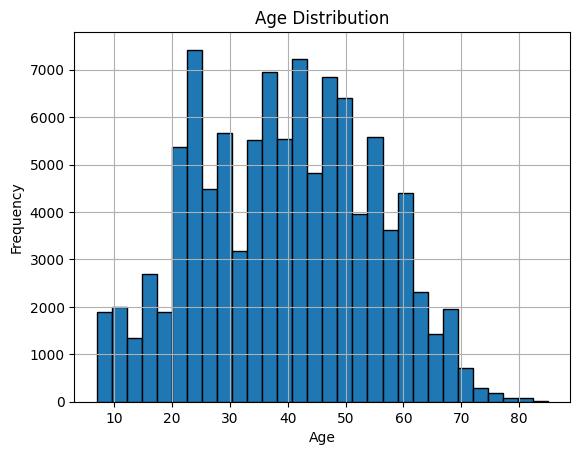

In [24]:
df_encoded['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

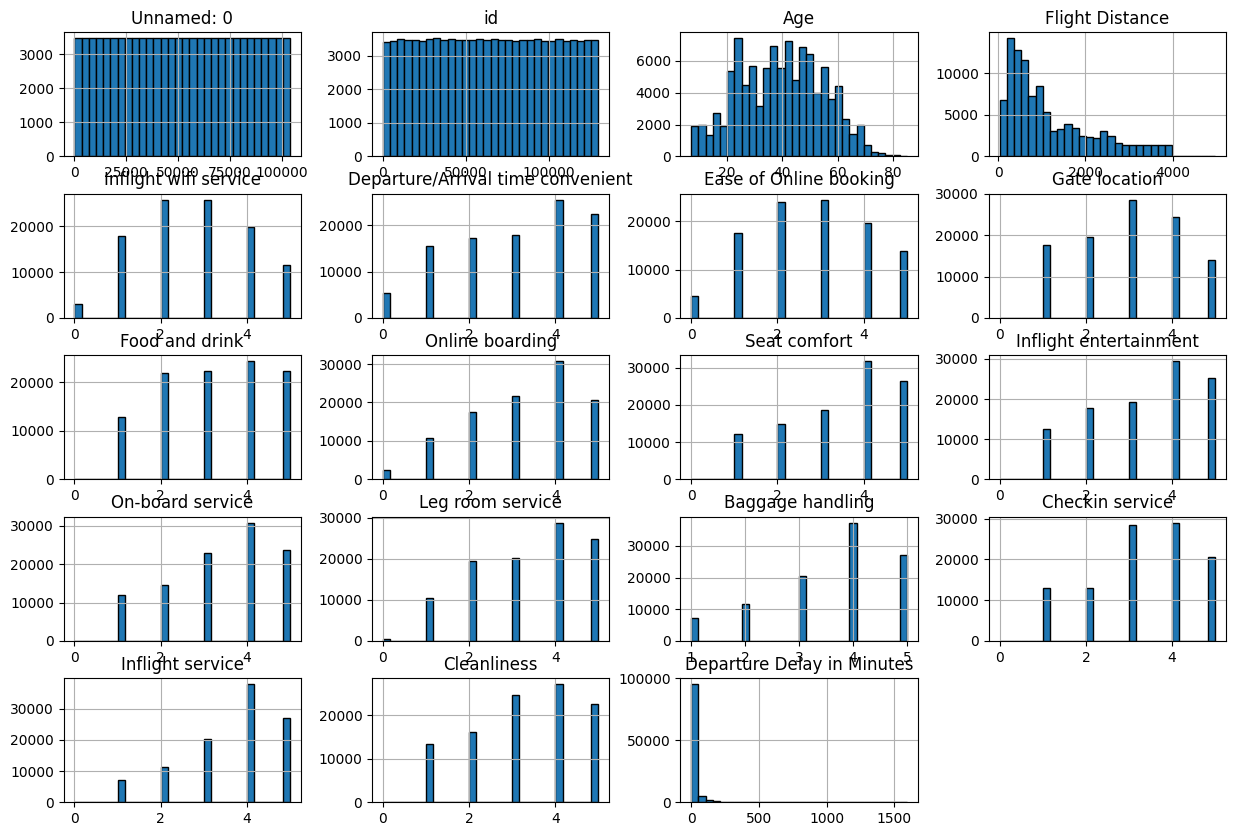

In [25]:
data.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.show()

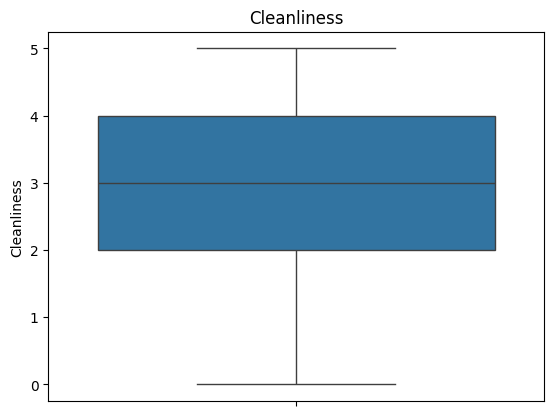

In [26]:
sns.boxplot(df_encoded['Cleanliness'])
plt.title('Cleanliness')
plt.show()

### Correlation

In [27]:
corr_matrix = df_encoded.corr()
corr_matrix

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
Unnamed: 0,1.000000,0.002991,0.004786,0.002794,-0.002490,0.000739,0.001913,0.005073,-0.002162,0.001002,...,-0.004321,-0.000134,-0.001117,-0.000045,-0.004731,0.003978,-0.002844,0.000856,-0.000559,-0.000823
id,0.002991,1.000000,0.022857,0.095544,-0.021276,-0.002110,0.014163,-0.000606,0.001063,0.055477,...,0.079273,0.079346,0.024965,-0.019546,0.013734,-0.000606,0.000145,0.000475,-0.080079,-0.048194
Age,0.004786,0.022857,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,...,0.035482,-0.049427,0.053611,-0.010152,0.137167,0.008928,-0.281674,-0.048524,-0.132551,-0.013376
Flight Distance,0.002794,0.095544,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,...,0.073072,0.057540,0.093149,0.002158,0.298780,0.005828,-0.225200,-0.267344,-0.404493,-0.123674
Inflight wifi service,-0.002490,-0.021276,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,...,0.043193,0.110441,0.132698,-0.017402,0.284245,0.008974,-0.007543,-0.105085,-0.037197,0.008034
Departure/Arrival time convenient,0.000739,-0.002110,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,...,0.093333,0.073318,0.014292,0.001005,-0.051601,0.009142,-0.206869,0.259763,0.082321,0.028740
Ease of Online booking,0.001913,0.014163,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,...,0.011081,0.035272,0.016179,-0.006371,0.171705,0.006951,-0.019509,-0.133511,-0.098039,-0.018914
Gate location,0.005073,-0.000606,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,...,-0.035427,0.001681,-0.003830,0.005467,0.000682,0.000333,0.006078,-0.030700,-0.003488,-0.002031
Food and drink,-0.002162,0.001063,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,...,0.087299,0.033993,0.657760,-0.029926,0.209936,0.005772,-0.059454,-0.063439,-0.078801,-0.016671
Online boarding,0.001002,0.055477,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,...,0.204462,0.074573,0.331517,-0.018982,0.503557,-0.042260,-0.189262,-0.224803,-0.293103,-0.074608


### Correlation HeatMap

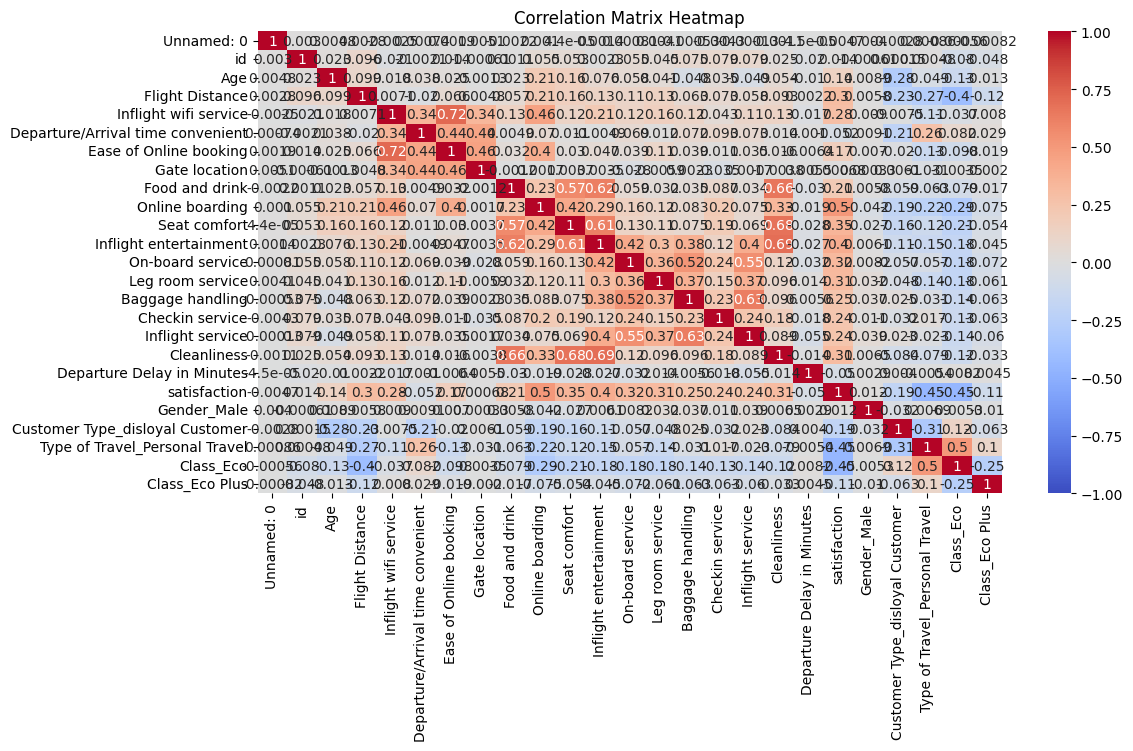

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Model Building

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBClassifier

In [30]:
X = df_encoded[['Age','Flight Distance','Gender_Male','Cleanliness', 'Leg room service', 'Departure Delay in Minutes']]
y = df_encoded['satisfaction']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
poly = PolynomialFeatures(degree=2, include_bias=False)c
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [33]:
model = XGBClassifier(max_depth=10, n_estimators=200)
model.fit(X_train_poly, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_poly)
accuracy = accuracy_score(y_pred,y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.759251239112651


In [35]:
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
print(f'mean Square error {mse}')

mean Square error 0.24074876088734903


In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_poly, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.7526015  0.75452632 0.75410526 0.75782002 0.75607555]
Mean cross-validation score: 0.7550257310745584


In [37]:
poly_f = joblib.dump(model,'Model_XGB.pkl')
polys = joblib.dump(poly,'Poly.pkl')
print("Model and transformer have been saved.")

Model and transformer have been saved.


In [38]:
model_load = joblib.load('Model_XGB.pkl')
poly_load = joblib.load('Poly.pkl')

In [39]:
features = [61, 119299, 1, 3, 4, 0]

In [40]:
features_poly = poly_load.transform(np.array(features).reshape(1, -1))
prediction = model_load.predict(features_poly)
print({'prediction': prediction[0]})

{'prediction': 1}


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [41]:
# Make the prediction using the loaded model
prediction = model_load.predict(features_poly)
prediction_proba = model_load.predict_proba(features_poly)
print(f'Prediction {prediction}')
print(f'Predictionprobability {prediction_proba}')

Prediction [1]
Predictionprobability [[0.06169546 0.93830454]]


### Machine Learning algorithm (Handles missing data, highly flexible with various hyperparameters, often yields strong performance)

I Used two Different model parameters to identify the accuracy

In [42]:
model = XGBClassifier(eval_metric='logloss', random_state=42)
model_fit = model.fit(X_train_poly, y_train)

In [43]:
pred = model_fit.predict(X_test_poly)

In [44]:
accuracy = accuracy_score(pred,y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7766709975458351


In [45]:
y_pred = model_fit.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
print(f'mean Square error {mse}')

mean Square error 0.22332900245416487


### Model Dump

In [46]:
import joblib
import numpy as np

In [47]:
test_pol = joblib.dump(poly,'Test_pol.pkl')
test_mod = joblib.dump(model,'Test_mod.pkl')

In [48]:
test_mod = joblib.load('Test_mod.pkl')
test_pol = joblib.load('Test_pol.pkl')

### Make the prediction using the loaded model

In [49]:
prediction = test_mod.predict(features_poly)
prediction_proba = test_mod.predict_proba(features_poly)
print(f'Prediction {prediction}')
print(f'Predictionprobability {prediction_proba}')

Prediction [1]
Predictionprobability [[0.18308991 0.8169101 ]]


### Input Feature

In [50]:
features = [61, 119299, 1, 3, 4, 0]

In [51]:
features_poly = test_pol.transform(np.array(features).reshape(1, -1))
prediction = test_mod.predict(features_poly)
print({'prediction': prediction[0]})

{'prediction': 1}


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


### Fine-tune hyperparameters using GridSearchCV or RandomizedSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'n_estimators': [20,50],
    'learning_rate': [0.01,0.1],
    'max_depth': [3,5],
    'subsample' :[0.8],
    'colsample_bytree' :[0.0, 0.1],
    'min_child_weight': [1,3]
}

In [53]:
grid_search = GridSearchCV(estimator = model,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose = 1,
                           n_jobs = -1)

grid_search.fit(X_train_poly,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.0, 0.1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'min_child_weight': [1, 3], 'n_estimators': [20, 50],
                         'subsample': [0.8]},
             scoring='accuracy', verbose=1)

In [54]:
print(f"Best Hyper_parameters: { grid_search.best_params_}")
print(f"Best Cross-Validatio Score: {grid_search.best_score_}")

Best Hyper_parameters: {'colsample_bytree': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}
Best Cross-Validatio Score: 0.7673327773234819


In [55]:
grid_model = joblib.dump(grid_search,'Grid_search_model.pkl')

In [56]:
grid_load = joblib.load('Grid_search_model.pkl')

In [57]:
pred_grid = grid_load.predict(features_poly)
pred_grid_prob = grid_load.predict(features_poly)

In [63]:
pred_grid

array([1])

### "Predicted Value is 1, it means the Airlines Customers are satisfied based on features we provided"

In [58]:
grid_load.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.1, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

###  First Model importance

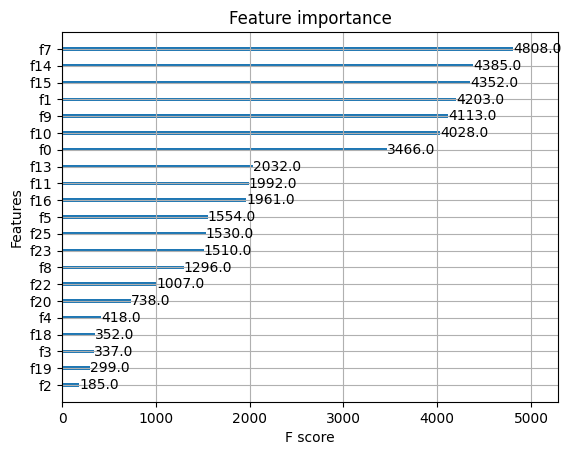

In [59]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
plot_importance(model_load)
plt.show()

###  Second Model importance

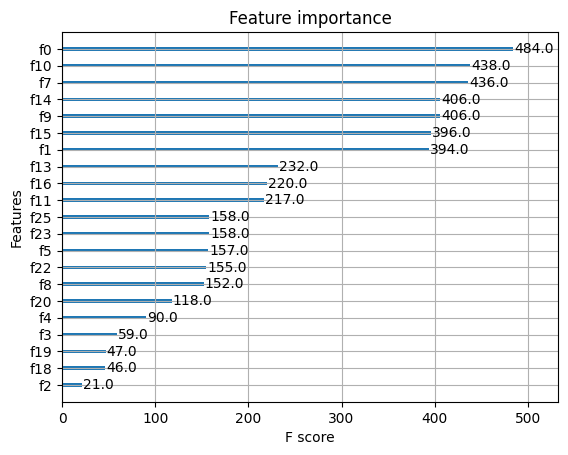

In [60]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
plot_importance(test_mod)
plt.show()